Z_max: -15.45375174850194
Z_min: -18.348486809853636
[[-90.         -89.92681503 -89.85372079 ... -87.38768082 -87.4554193
  -87.52324849]
 [-89.9576712  -89.88448802 -89.81139557 ... -87.34700003 -87.4147403
  -87.48257129]
 [-89.91537009 -89.8421887  -89.76909804 ... -87.30634693 -87.37408899
  -87.44192177]
 ...
 [-87.44218181 -87.3743593  -87.30662748 ... -89.76899334 -89.84209587
  -89.91528914]
 [-87.48283137 -87.41501064 -87.34728061 ... -89.81129096 -89.88439527
  -89.95759034]
 [-87.52350861 -87.45568967 -87.38796143 ... -89.85361626 -89.92672237
  -89.99991923]]


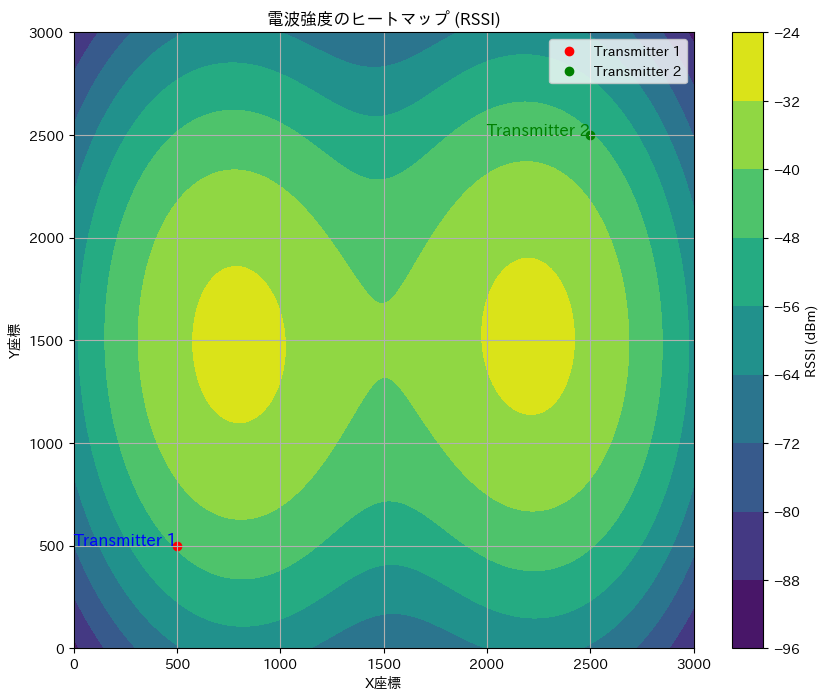

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import japanize_matplotlib

# 3000x3000の座標平面を作成
x = np.linspace(0, 3000, 3000)
y = np.linspace(0, 3000, 3000)
X, Y = np.meshgrid(x, y)

# 電波発信端末の座標とGMMのパラメータを設定
transmitter_1 = [500, 500]  # 端末1の平均 (中心座標)
transmitter_2 = [2500, 2500]  # 端末2の平均 (中心座標)

covariance_matrix_1 = [[500000, 0], [0, 500000]]  # 端末1の共分散行列
covariance_matrix_2 = [[500000, 0], [0, 500000]]  # 端末2の共分散行列
weights = [0.5, 0.5]  # GMMの重み

# ガウス混合モデルを初期化
gmm = GaussianMixture(n_components=2, covariance_type="full", weights_init=weights)

# ガウス混合モデルを学習
gmm.means_init = np.array([transmitter_1, transmitter_2])
gmm.covariances_init = np.array([covariance_matrix_1, covariance_matrix_2])
gmm.fit(np.column_stack((X.ravel(), Y.ravel())))

# 各座標点での電波強度を計算
Z = gmm.score_samples(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

# Zの最大値と最小値を取得
Z_max = np.max(Z)
Z_min = np.min(Z)

print("Z_max:", Z_max)
print("Z_min:", Z_min)

# 実際のRSSI値にスケーリング (例: -30dBm から -90dBm の範囲)
RSSI_max = -30  # dBm
RSSI_min = -90  # dBm

# 正規化された Z を実際のRSSI値にスケーリング
RSSI = RSSI_min + (Z - Z_min) / (Z_max - Z_min) * (RSSI_max - RSSI_min)


print(RSSI)

# プロット
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, RSSI, cmap="viridis")
plt.colorbar(label="RSSI (dBm)")

plt.scatter(
    transmitter_1[0], transmitter_1[1], color="red", marker="o", label="Transmitter 1"
)
plt.scatter(
    transmitter_2[0], transmitter_2[1], color="green", marker="o", label="Transmitter 2"
)
plt.text(
    transmitter_1[0],
    transmitter_1[1],
    "Transmitter 1",
    color="blue",
    fontsize=12,
    ha="right",
)
plt.text(
    transmitter_2[0],
    transmitter_2[1],
    "Transmitter 2",
    color="green",
    fontsize=12,
    ha="right",
)
plt.xlabel("X座標")
plt.ylabel("Y座標")
plt.title("電波強度のヒートマップ (RSSI)")
plt.legend()
plt.grid(True)
plt.show()